In [46]:
#Selvitetään minkälaista on ollut erilaisten raaka-aineiden hintakehitys markkinoilla vuoden sisällä.
#Raaka-öljy = Crude Oil Sep 24 (CL=F)
#Kulta = Gold Dec 24 (GC=F)
#Hopea = Silver Sep 24 (SI=F)
#Kupari = Copper Sep 24 (HG=F)
#Maakaasu = Natural Gas Sep 24 (NG=F)
#Sokeri = Sugar #11 Oct 24 (SB=F)
#Kahvi = Coffee Dec 24 (KC=F)
#Alumiini = Aluminum Futures,Oct-2024 (ALI=F)
#Vehnä = Chicago SRW Wheat Futures,Dec-2 (ZW=F)
#Appelsiinimehu = Orange Juice Nov 24 (OJ=F)
#Kaakao = Cocoa Dec 24 (CC=F)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [48]:
#Luodaan lista tickereistä
tickerit = ['CL=F', 'GC=F', 'SI=F', 'HG=F', 'NG=F', 'SB=F', 'KC=F', 'ALI=F', 'ZW=F', 'OJ=F', 'CC=F']

In [49]:
#Haetaan data
data = yf.download(tickerit, period='1y')

[*********************100%%**********************]  11 of 11 completed


In [50]:
print(data.head(5))

Price      Adj Close                                                      \
Ticker         ALI=F    CC=F       CL=F         GC=F    HG=F        KC=F   
Date                                                                       
2023-08-02   2150.50  3562.0  79.489998  1937.400024  3.8275  166.949997   
2023-08-03   2168.25  3491.0  81.550003  1932.000000  3.8760  164.750000   
2023-08-04   2172.00  3510.0  82.820000  1939.599976  3.8450  161.350006   
2023-08-07   2166.75  3476.0  81.940002  1933.500000  3.8130  163.949997   
2023-08-08   2133.00  3333.0  82.919998  1924.099976  3.7480  161.350006   

Price                                                ...   Volume          \
Ticker       NG=F        OJ=F       SB=F       SI=F  ...     CC=F    CL=F   
Date                                                 ...                    
2023-08-02  2.477  302.500000  24.200001  23.754000  ...  28982.0  414825   
2023-08-03  2.565  299.250000  24.020000  23.586000  ...  33437.0  402641   
2023-0

In [61]:
#Otetaan huomioon taas vain Adj close
df = data['Adj Close'].copy()
adj_closet = df.resample('M').median()

In [62]:
print(adj_closet.head(5))

Ticker         ALI=F    CC=F       CL=F         GC=F     HG=F        KC=F  \
Date                                                                        
2023-08-31  2124.000  3369.0  81.205002  1916.650024  3.75700  152.824997   
2023-09-30  2201.625  3579.5  89.855000  1918.250000  3.73375  151.099998   
2023-10-31  2197.125  3613.0  85.514999  1925.049988  3.59275  155.974998   
2023-11-30  2206.000  4019.0  77.134998  1982.750000  3.71350  177.224998   
2023-12-31  2179.625  4285.5  72.044998  2030.349976  3.88275  193.875000   

Ticker        NG=F        OJ=F       SB=F       SI=F     ZW=F  
Date                                                           
2023-08-31  2.6065  316.199997  24.010000  23.362000  608.250  
2023-09-30  2.6680  341.074997  26.665000  23.126500  577.250  
2023-10-31  3.1365  385.074997  27.045000  22.748500  572.125  
2023-11-30  3.0370  407.425003  27.219999  23.485001  561.750  
2023-12-31  2.5535  365.225006  21.980000  24.068001  616.000  


In [63]:
#Muutetaan arvot prosentuaalisiksi siten, että vuoden ensimmäinen päivä on vertailukohde 
adj_closet_pct = adj_closet.pct_change(fill_method=None)
adj_closet_pct = adj_closet_pct.iloc[1:]
print(adj_closet_pct)

Ticker         ALI=F      CC=F      CL=F      GC=F      HG=F      KC=F  \
Date                                                                     
2023-09-30  0.036547  0.062481  0.106521  0.000835 -0.006188 -0.011287   
2023-10-31 -0.002044  0.009359 -0.048300  0.003545 -0.037764  0.032263   
2023-11-30  0.004039  0.112372 -0.097995  0.029973  0.033609  0.136240   
2023-12-31 -0.011956  0.066310 -0.065988  0.024007  0.045577  0.093948   
2024-01-31  0.002122  0.037919  0.018947 -0.002142 -0.022729 -0.042940   
2024-02-29 -0.002232  0.338804  0.052309  0.000987  0.007445  0.033549   
2024-03-31  0.014913  0.348531  0.046408  0.065360  0.045321 -0.004041   
2024-04-30  0.138627  0.289646  0.044535  0.079332  0.082082  0.175785   
2024-05-31  0.006800 -0.163714 -0.066856  0.002680  0.108117 -0.072025   
2024-06-30 -0.030910  0.115229 -0.002158 -0.005432 -0.055202  0.087092   
2024-07-31 -0.058348 -0.166270  0.038667  0.029349 -0.025237  0.047009   
2024-08-31 -0.049916 -0.188998 -0.0615

In [64]:
#Nyt on hyvä data ja sitä voidaan alkaa visualisoimaan

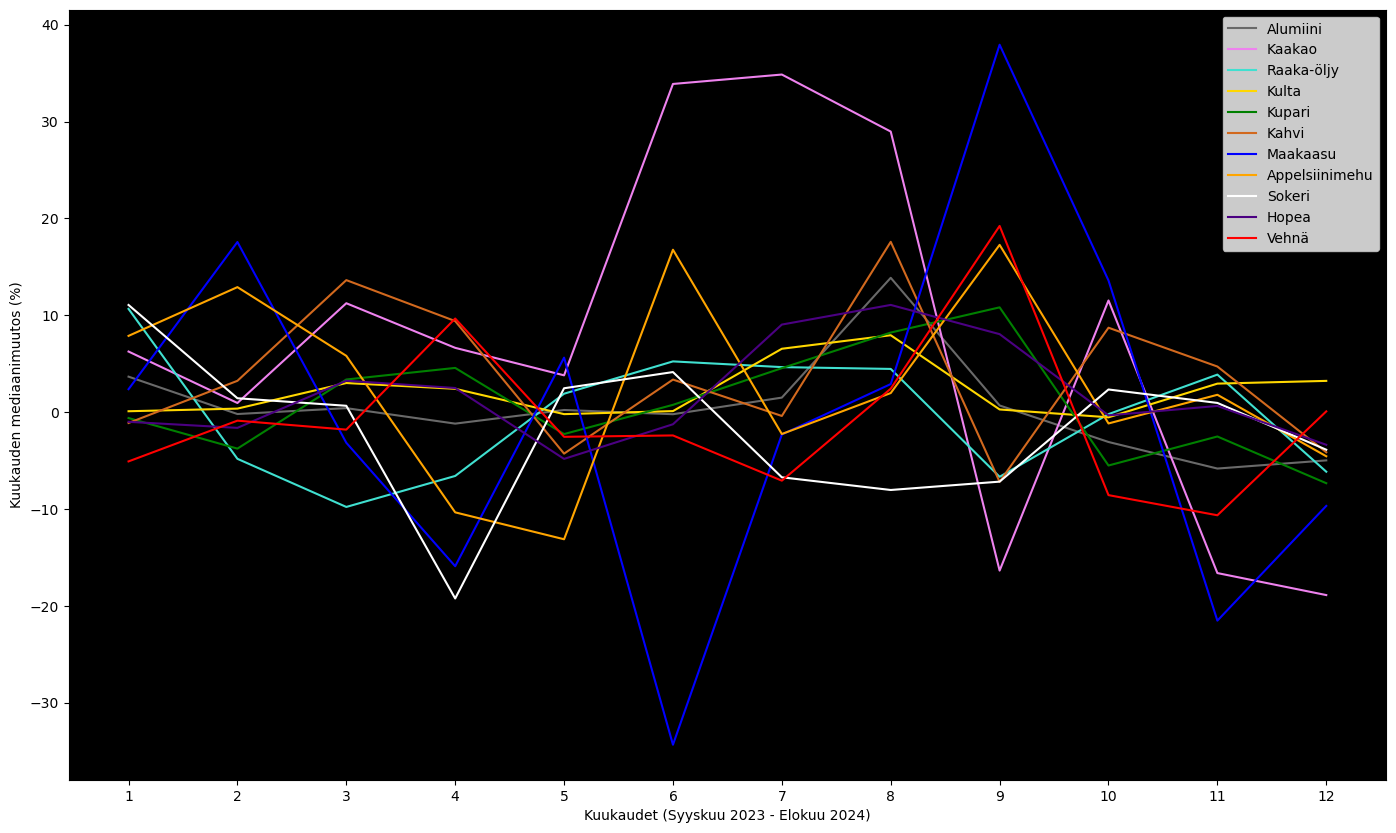

In [98]:
kuukaudet = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

plt.figure(figsize=(17,10))
plt.plot(kuukaudet, adj_closet_pct['ALI=F']*100, label='Alumiini', color='dimgrey')
plt.plot(kuukaudet, adj_closet_pct['CC=F']*100, label='Kaakao', color='violet')
plt.plot(kuukaudet, adj_closet_pct['CL=F']*100, label='Raaka-öljy', color='turquoise')
plt.plot(kuukaudet, adj_closet_pct['GC=F']*100, label='Kulta', color='gold')
plt.plot(kuukaudet, adj_closet_pct['HG=F']*100, label='Kupari', color='green')
plt.plot(kuukaudet, adj_closet_pct['KC=F']*100, label='Kahvi', color='chocolate')
plt.plot(kuukaudet, adj_closet_pct['NG=F']*100, label='Maakaasu', color='blue')
plt.plot(kuukaudet, adj_closet_pct['OJ=F']*100, label='Appelsiinimehu', color='orange')
plt.plot(kuukaudet, adj_closet_pct['SB=F']*100, label='Sokeri', color='w')
plt.plot(kuukaudet, adj_closet_pct['SI=F']*100, label='Hopea', color='indigo')
plt.plot(kuukaudet, adj_closet_pct['ZW=F']*100, label='Vehnä', color='red')

plt.ylabel('Kuukauden mediaanimuutos (%)')
plt.xlabel('Kuukaudet (Syyskuu 2023 - Elokuu 2024)')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax = plt.gca()
ax.set_facecolor('black')

plt.legend()